
# Laboratorio de Visualización: Matplotlib → Seaborn (dataset `titanic`)

**Obxectivo:** práctica gradual e organizada. Comezamos con **Matplotlib** (gráficos básicos e subplots) e continuamos con **Seaborn** (visualización estatística).  
**Dataset:** `titanic` (integrado en Seaborn).

> Indícanse **parámetros concretos** nos enunciados para homoxeneizar os resultados na aula.



## 0) Preparación do contorno e carga de datos

- Importa `pandas`, `matplotlib.pyplot` como `plt` e `seaborn` como `sns`.
- Carga `titanic` con `sns.load_dataset("titanic")`.
- Amosar `head()` e `info()`.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga do dataset
titanic = sns.load_dataset("titanic")

# Exploración rápida
display(titanic.head())
titanic.info()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB



## 1) Matplotlib: gráficos básicos

> Nos seguintes exercicios usa **Matplotlib**. Para cada gráfico:
> - Crea unha figura con `plt.figure(figsize=(6,4))`.
> - Engade título con `plt.title(...)`.
> - Etiquetas de eixes con `plt.xlabel(...)`, `plt.ylabel(...)`.
> - Activa grella con `plt.grid(True, linestyle="--", linewidth=0.5)`.
> - Non establezas cores explícitas.



### 1.1 Liña: idade ordenada
- Filtra as filas con `age` non nula.
- Ordena por `age` ascendente.
- Debuxa un **gráfico de liña** da columna `age` (eixe Y) contra o un rango da lonxitude, `range(len(df))` (eixe X).
- Parámetros: `linewidth=1.5`, `alpha=0.9`. 


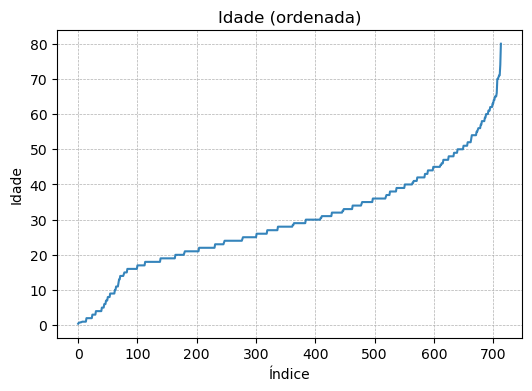

In [2]:

df = titanic.dropna(subset=["age"]).sort_values("age")
plt.figure(figsize=(6,4))
plt.plot(range(len(df)), df["age"], linewidth=1.5, alpha=0.9)
plt.title("Idade (ordenada)")
plt.xlabel("Índice")
plt.ylabel("Idade")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()



### 1.2 Dispersión: `age` vs `fare`
- Filtra filas con `age` e `fare` non nulas.
- **Scatter plot**: X=`age`, Y=`fare`.
- Parámetros: `s=20` (tamaño), `alpha=0.6`, `marker='o'`.
- Limita eixes: `xlim(0, 80)`; `ylim(0, 300)`.


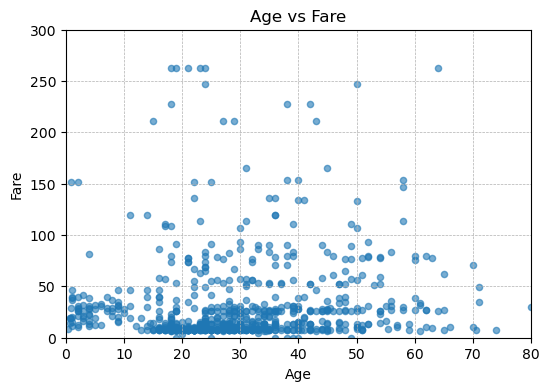

In [3]:

df = titanic.dropna(subset=["age","fare"])
plt.figure(figsize=(6,4))
plt.scatter(df["age"], df["fare"], s=20, alpha=0.6, marker='o')
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.xlim(0, 80); plt.ylim(0, 300)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()



### 1.3 Histograma: `age`
- Filtra `age` non nula.
- **Histograma** con `bins=20`, `edgecolor="black"`, `alpha=0.8`.
- Engade `plt.axvline(df["age"].mean(), linestyle="--", linewidth=1)` para a media.


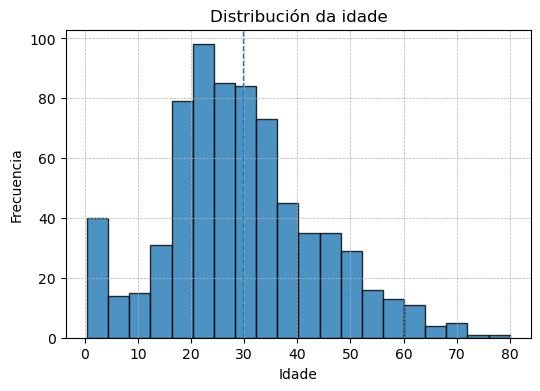

In [4]:

df = titanic.dropna(subset=["age"])
plt.figure(figsize=(6,4))
plt.hist(df["age"], bins=20, edgecolor="black", alpha=0.8)
plt.axvline(df["age"].mean(), linestyle="--", linewidth=1)
plt.title("Distribución da idade")
plt.xlabel("Idade")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()



### 1.4 Barras: media de `fare` por `class`
- Calcula a media de `fare` por `class` con `groupby`.
- **Bar plot** vertical con `plt.bar`.
- Ordena o índice de `class` como `['Third','Second','First']` antes de debuxar.

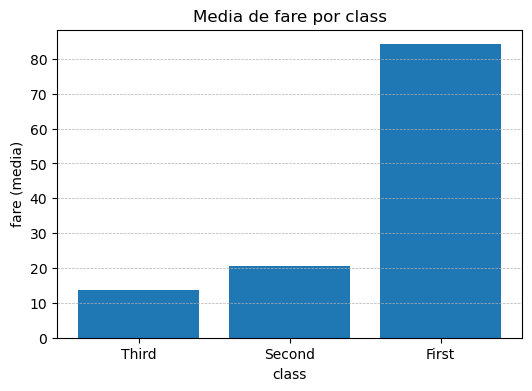

In [7]:

mean_fare = (titanic.dropna(subset=["fare","class"])
                   .groupby("class",observed=False)["fare"].mean()
                   .reindex(["Third","Second","First"]))
plt.figure(figsize=(6,4))
plt.bar(mean_fare.index, mean_fare.values)

plt.title("Media de fare por class")
plt.xlabel("class")
plt.ylabel("fare (media)")
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.show()



### 1.5 Barras horizontais: conteos por `embark_town`
- Conta rexistros por `embark_town` (exclúe nulos) (`dropna` -> `value_counts` -> `sort_values`).
- **Barra horizontal** con `plt.barh` e etiquetas nos eixes.
- Ordena de menor a maior.


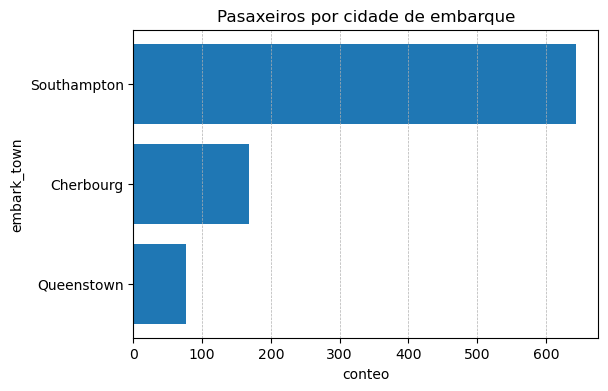

In [8]:

counts = titanic["embark_town"].dropna().value_counts().sort_values()
plt.figure(figsize=(6,4))
plt.barh(counts.index, counts.values)
plt.title("Pasaxeiros por cidade de embarque")
plt.xlabel("conteo")
plt.ylabel("embark_town")
plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
plt.show()



### 1.6 Boxplot (Matplotlib): `age` por `sex`
- Filtra `age` non nula.
- Crea un boxplot con dúas caixas (home/muller) usando listas de valores.
- Parámetros: `showmeans=True`, `meanline=True`.
- Etiqueta eixes e engade título.


In [10]:
import matplotlib
print (matplotlib.__version__)

3.8.0


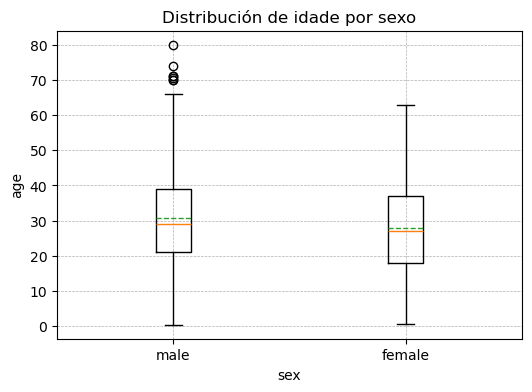

In [11]:
# ATENCIÓN: VÁLIDO PARA matplotlib <=3.8
df = titanic.dropna(subset=['age'])
data = [df[df['sex']=='male']['age'], df[df['sex']=='female']['age']]
#display(data)
plt.figure(figsize=(6,4))
plt.boxplot(data,labels=['male','female'], showmeans=True, meanline=True)
plt.title("Distribución de idade por sexo")
plt.xlabel("sex"); plt.ylabel("age")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

In [9]:
# ATENCIÓN: VÁLIDO PARA matplotlib >= 3.10
df = titanic.dropna(subset=['age'])
data = [df[df['sex']=='male']['age'], df[df['sex']=='female']['age']]
#display(data)
plt.figure(figsize=(6,4))
plt.boxplot(data,tick_labels=['male','female'], showmeans=True, meanline=True)
plt.title("Distribución de idade por sexo")
plt.xlabel("sex"); plt.ylabel("age")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'tick_labels'

<Figure size 600x400 with 0 Axes>


### 1.7 Gráfico circular: proporción `survived`
- Calcula proporcións de `survived` (0/1) excluíndo nulos.
```python
s = titanic["survived"].dropna().value_counts().reindex([0,1]).fillna(0)
```
- Debuxa un `plt.pie` con etiquetas `["Non","Si"]` e `autopct="%1.1f%%"`.
- `startangle=90` e `counterclock=False`.


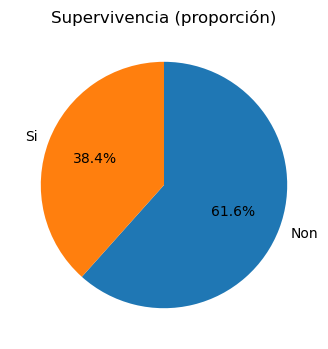

In [12]:
s = titanic["survived"].dropna().value_counts().reindex([0,1]).fillna(0)
plt.figure(figsize=(6,4))
plt.pie(s.values, labels=['Non','Si'],autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title('Supervivencia (proporción)')
plt.show()


## 2) Matplotlib: Subplots

Crea composicións de varias gráficas na mesma figura.

**Regras comúns:**
- Usa `fig, axes = plt.subplots(...)` co `figsize` indicado.
- Engade `plt.suptitle(...)` para o título xeral.
- `plt.tight_layout()` ao final.



### 2.1 Táboa 2x2
- `figsize=(9,7)`
- (1,1) Histograma de `age` con `bins=15`.
- (1,2) Dispersión `age` vs `fare`.
- (2,1) Barras horizontais de conteos por `class`.
- (2,2) Boxplot de `fare` por `sex` (usa Matplotlib).


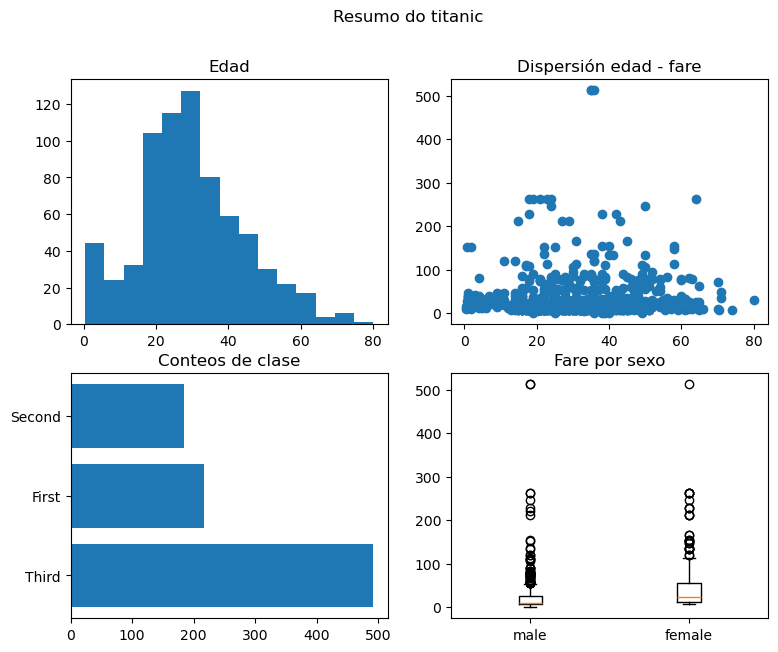

In [14]:
# ATENCIÓN: VÁLIDO PARA matplotlib <=3.8 --> Contedor jupyter/scipy-notebook
fig, axs = plt.subplots(2,2,figsize=(9,7))
axs[0,0].hist(titanic['age'],bins=15)
axs[0,0].set_title('Edad')

axs[0,1].scatter(titanic['age'],titanic['fare'])
axs[0,1].set_title('Dispersión edad - fare')

class_counts = titanic['class'].dropna().value_counts()
axs[1,0].barh(class_counts.index, class_counts.values)


axs[1,0].set_title('Conteos de clase')
df = titanic.dropna(subset=['sex'])
data = [df[df['sex']=='male']['fare'], df[df['sex']=='female']['fare']]
axs[1,1].boxplot(data,labels=['male','female']) # Na versión 3.10 hai que substituir "labels" por "tick_labels"
axs[1,1].set_title('Fare por sexo')

plt.suptitle('Resumo do titanic')
plt.show()

In [ ]:
# ATENCIÓN: VÁLIDO PARA matplotlib >=3.10
fig, axs = plt.subplots(2,2,figsize=(9,7))
axs[0,0].hist(titanic['age'],bins=15)
axs[0,0].set_title('Edad')

axs[0,1].scatter(titanic['age'],titanic['fare'])
axs[0,1].set_title('Dispersión edad - fare')

class_counts = titanic['class'].dropna().value_counts()
axs[1,0].barh(class_counts.index, class_counts.values)


axs[1,0].set_title('Conteos de clase')
df = titanic.dropna(subset=['sex'])
data = [df[df['sex']=='male']['fare'], df[df['sex']=='female']['fare']]
axs[1,1].boxplot(data,tick_labels=['male','female'])
axs[1,1].set_title('Fare por sexo')

plt.suptitle('Resumo do titanic')
plt.show()


### 2.2 Subplots compartindo eixo X
- Filtra `age` e `survived` non nulos.
- Crea 2 subplots **(2x1)** con `sharex=True`, `figsize=(7,6)`.
- No subplot superior:
  - Histograma de `age`.
  - parámetros: `bins=20`, `edgecolor=black`, `alpha=0.8`.
  - etiquetas: y -> "Frecuencia Total",  título -> "Distribución de idades"
- No subplot inferior.
  - Histograma aplilado de dúas series:
    - Idades de pasaxeiros que non sobreviviron (`survived = 0`)
    - Idades de pasaxeiros que nsobreviviron (`survived = 1`)
  - parámetros: `bins=20`, `edgecolor=black`, `alpha=0.8`, `label =['Non sobreviviu', 'Sobreviviu']`. 
  - Etiquetas: x -> 'Idade', y -> 'Frecuencia por estado', título -> 'Idades por supervivencia'
  - Engade `axes[1].legend() `


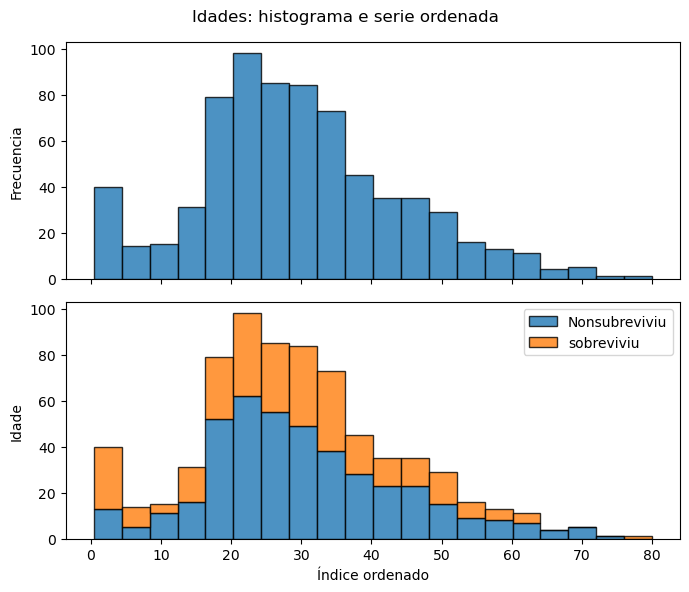

In [15]:
import numpy as np

df = titanic.dropna(subset=["age"]).sort_values("age")
x = df['age'].values
pos = np.arange(len(x))
fig, axes = plt.subplots(2,1, figsize=(7,6), sharex=True)
axes[0].hist(df["age"], bins=20, edgecolor="black", alpha=0.8)
axes[0].set_ylabel("Frecuencia")

data = [df[df["survived"] == 0]["age"], df[df["survived"] == 1]["age"]]
axes[1].hist(data,stacked=True,label=['Nonsubreviviu','sobreviviu'],bins = 20,edgecolor="black", alpha=0.8)
axes[1].set_xlabel("Índice ordenado"); axes[1].set_ylabel("Idade")
axes[1].legend()
plt.suptitle("Idades: histograma e serie ordenada")
plt.tight_layout()
plt.show()



## 3) Seaborn: visualización estatística

Emprega **Seaborn** co mesmo dataset `titanic`.



### 3.1 Conteos por `class` (countplot)
- `sns.countplot` con `x="class"`.
- Ordena categorías de `class` como `['Third','Second','First']`.
- Engade `plt.title("Pasaxeiros por clase")` e `plt.grid(axis="y", linestyle="--", linewidth=0.5)`.


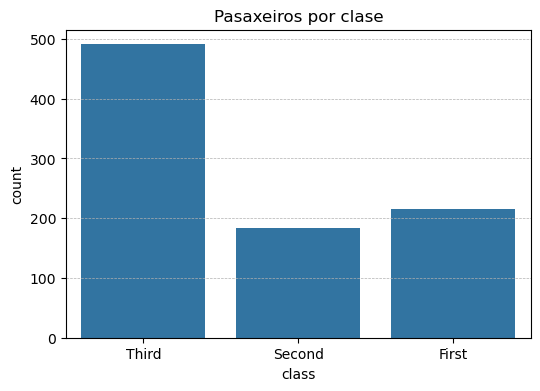

In [16]:
plt.figure(figsize=(6,4))
order = ['Third', 'Second', 'First']
sns.countplot(data=titanic,x='class',order=order)
plt.title('Pasaxeiros por clase')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


### 3.2 Distribución de `age` por `sex` (histplot + kde)
- Usa `sns.histplot` con `x="age"`, `hue="sex"`, `bins=20`, `kde=True`, `element="step"`, `stat="density"`, `common_norm=False`.
- Exclúe nulos en `age`.


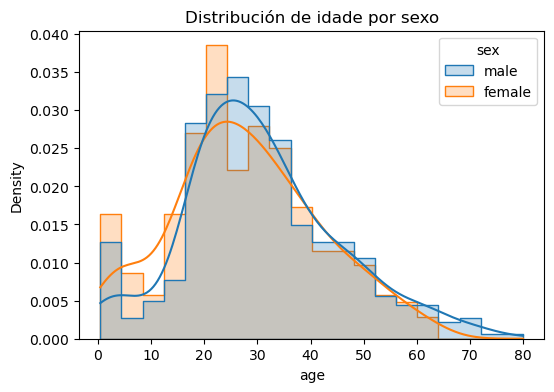

In [17]:
df = titanic.dropna(subset=['age'])
plt.figure(figsize=(6,4))
sns.histplot(df,x='age', hue='sex', bins=20, kde=True, element='step', stat='density', common_norm=False)
plt.title("Distribución de idade por sexo")
plt.show()



### 3.3 Boxplot: `fare` por `class`
- `sns.boxplot` con `x="class"`, `y="fare"`.
- Exclúe nulos en `fare`.
- Engade título e eixo Y ata 300 con `plt.ylim(0, 300)`.


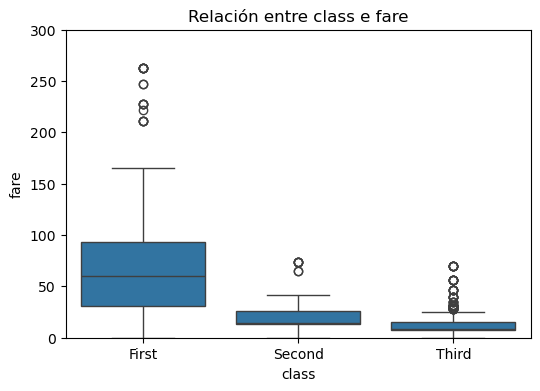

In [18]:
df = titanic.dropna(subset=['fare'])
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='class',y='fare')
plt.title('Relación entre class e fare')
plt.ylim(0,300)
plt.show()



### 3.4 Violinplot: `fare` por `survived`
- `sns.violinplot` con `x="survived"`, `y="fare"`.
- Exclúe nulos en `fare`.
- Título e `ylim(0, 300)`.


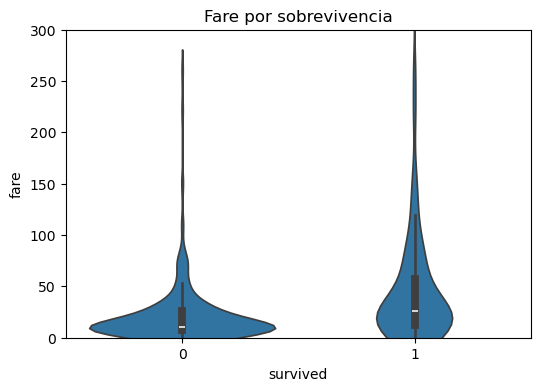

In [19]:

df = titanic.dropna(subset=["fare","survived"])
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x="survived", y="fare")
plt.ylim(0, 300)
plt.title("Fare por sobrevivencia")
plt.show()



### 3.5 Dispersión: `age` vs `fare` con `hue="class"` e `style="sex"`
- `sns.scatterplot` con `x="age"`, `y="fare"`, `hue="class"`, `style="sex"`.
- Exclúe nulos en `age` e `fare`.
- Limita eixes como en 1.2.


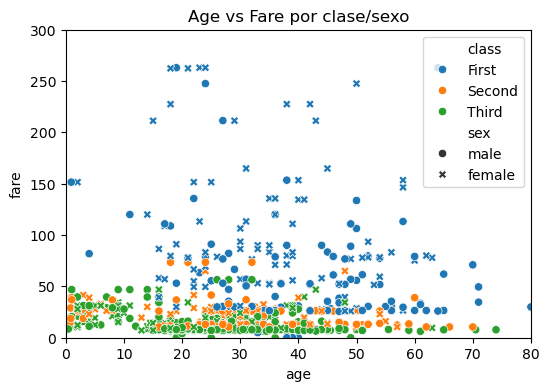

In [20]:

df = titanic.dropna(subset=["age","fare","class","sex"])
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="age", y="fare", hue="class", style="sex")
plt.xlim(0, 80); plt.ylim(0, 300)
plt.title("Age vs Fare por clase/sexo")
plt.show()



### 3.6 Barras (media): `age` por `class` e `sex`
- `sns.barplot` con `x="class"`, `y="age"`, `hue="sex"`, `estimator=np.mean`, `errorbar="ci"`.
- Exclúe nulos en `age`.
- Ordena `class` como antes.


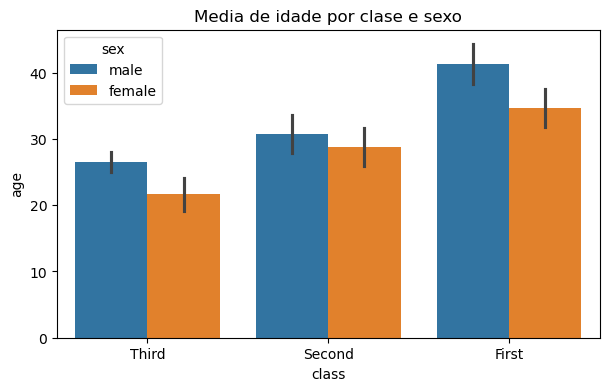

In [32]:

df = titanic.dropna(subset=["age","class","sex"])
plt.figure(figsize=(7,4))


sns.barplot(data=df, x="class", y="age", hue="sex",
            estimator=np.mean, errorbar="ci",
            order=["Third","Second","First"])

plt.title("Media de idade por clase e sexo")
plt.show()



### 3.7 Mapa de calor: correlación numérica
- Selecciona columnas numéricas e calcula `corr()`.
```python
num = titanic.select_dtypes(include="number")
corr = num.corr(numeric_only=True)
```
- `sns.heatmap` con `annot=True`, `fmt=".2f"`, `linewidths=.5`.


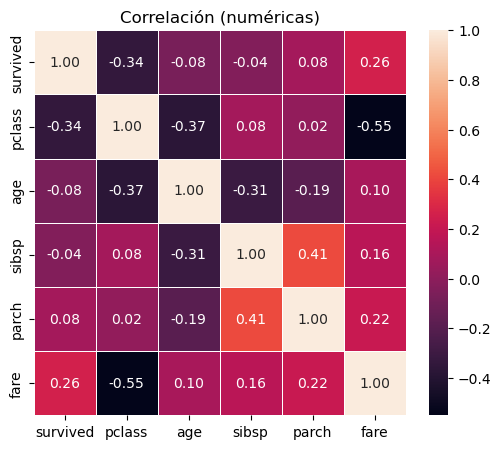

In [33]:

num = titanic.select_dtypes(include="number")
corr = num.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlación (numéricas)")
plt.show()



### 3.8 Pairplot (numéricas principais)
- Selecciona `["age","fare","sibsp","parch"]`, elimina nulos e crea `sns.pairplot`.


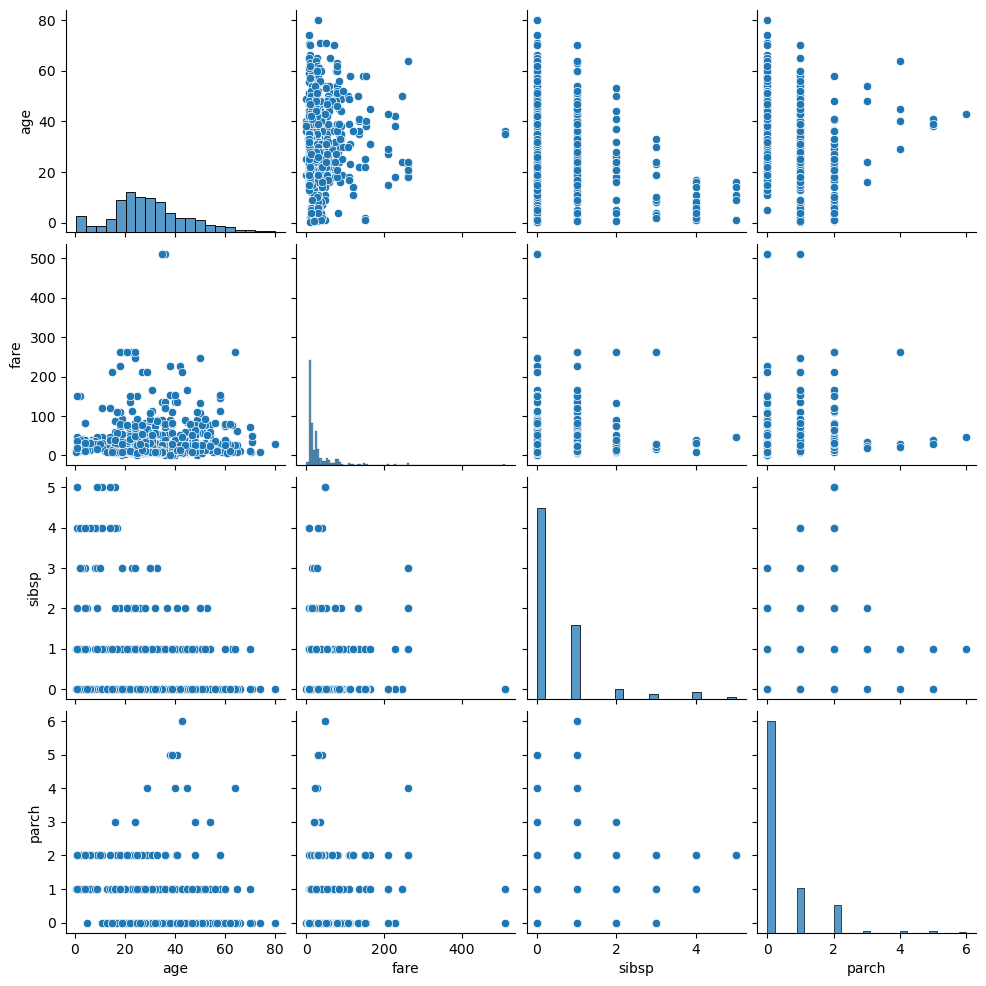

In [34]:

cols = ["age","fare","sibsp","parch"]
df = titanic[cols].dropna()
sns.pairplot(df)
plt.show()



### 3.9 Jointplot: `age` vs `fare`
- `sns.jointplot` con `x="age"`, `y="fare"`, `kind="scatter"`.
- Exclúe nulos.


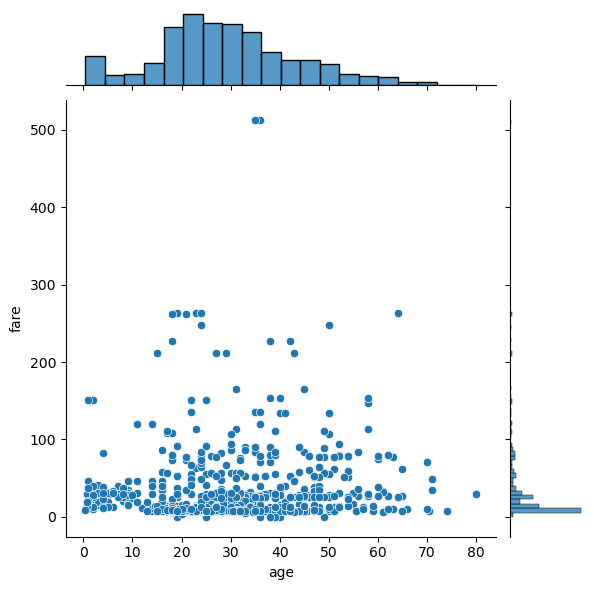

In [35]:

df = titanic.dropna(subset=["age","fare"])
sns.jointplot(data=df, x="age", y="fare", kind="scatter")
plt.show()



### 3.10 Catplot: conteos por `sex` e `class`
- `sns.catplot(kind="count")` con `x="sex"`, `hue="class"`, `col="survived"`.
- Axuste: `height=4`, `aspect=1.2`.
- `g.set_titles("survived = {col_name}")`


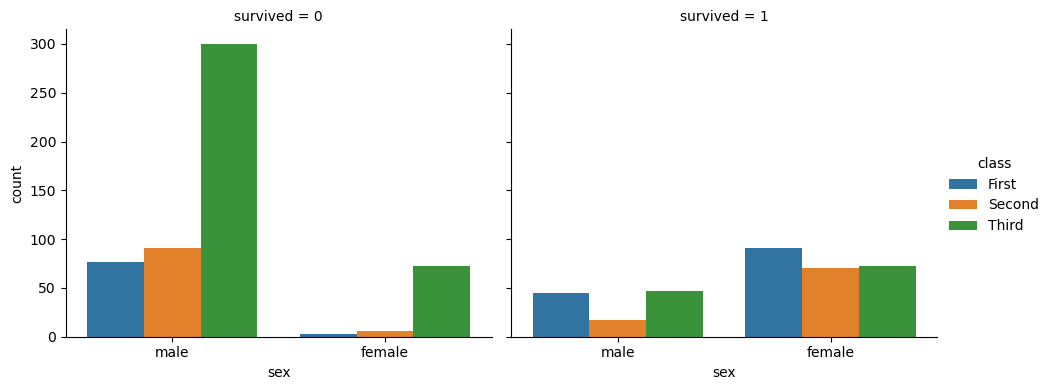

In [36]:

g = sns.catplot(data=titanic, kind="count", x="sex", hue="class",
                 col="survived", height=4, aspect=1.2)
g.set_titles("survived = {col_name}")
plt.show()

